In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.ensemble import IsolationForest


In [2]:
df = pd.read_csv('fg.csv')
df

Team_ID          Team_Name  Points  Played  Wins  Draws  Losses  \
0         1    Manchester City      86      38    27      5       6   
1         2          Liverpool      83      38    25      8       5   
2         3            Chelsea      75      38    22      9       7   
3         4          Tottenham      71      38    21      8       9   
4         5            Arsenal      66      38    20      6      12   
5         6  Manchester United      58      38    16     10      12   
6         7           West Ham      56      38    16      8      14   
7         8     Leicester City      52      38    14     10      14   
8         9           Brighton      51      38    12     15      11   
9        10      Wolverhampton      51      38    15      6      17   
10       11          Newcastle      49      38    13     10      15   
11       12     Crystal Palace      48      38    11     15      12   
12       13          Brentford      46      38    13      7      18   
13       14        Aston Villa      45      38    13      6      19   
14       15        Southampton      40      38    10     10      18   
15       16            Everton      39      38    11      6      21   
16       17       Leeds United      38      38     9     11      18   
17       18            Burnley      35      38     7     14      17   
18       19            Watford      23      38     6      5      27   
19       20       Norwich City      22      38     5      7      26   

    Goals_For  Goals_Against  Goal_Difference  
0          95             30               65  
1          89             33               56  
2          76             32               44  
3          69             35               34  
4          63             42               21  
5          57             50                7  
6          60             51                9  
7          53             58               -5  
8          42             44               -2  
9          38             43               -5  
10         44             62              -18  
11         50             46                4  
12         48             56               -8  
13         52             54               -2  
14         43             67              -24  
15         43             66              -23  
16         42             79              -37  
17         34             53              -19  
18         34             77              -43  
19         23             84              -61

In [3]:
df.head()

Team_ID        Team_Name  Points  Played  Wins  Draws  Losses  Goals_For  \
0        1  Manchester City      86      38    27      5       6         95   
1        2        Liverpool      83      38    25      8       5         89   
2        3          Chelsea      75      38    22      9       7         76   
3        4        Tottenham      71      38    21      8       9         69   
4        5          Arsenal      66      38    20      6      12         63   

   Goals_Against  Goal_Difference  
0             30               65  
1             33               56  
2             32               44  
3             35               34  
4             42               21

In [4]:
df

Team_ID          Team_Name  Points  Played  Wins  Draws  Losses  \
0         1    Manchester City      86      38    27      5       6   
1         2          Liverpool      83      38    25      8       5   
2         3            Chelsea      75      38    22      9       7   
3         4          Tottenham      71      38    21      8       9   
4         5            Arsenal      66      38    20      6      12   
5         6  Manchester United      58      38    16     10      12   
6         7           West Ham      56      38    16      8      14   
7         8     Leicester City      52      38    14     10      14   
8         9           Brighton      51      38    12     15      11   
9        10      Wolverhampton      51      38    15      6      17   
10       11          Newcastle      49      38    13     10      15   
11       12     Crystal Palace      48      38    11     15      12   
12       13          Brentford      46      38    13      7      18   
13       14        Aston Villa      45      38    13      6      19   
14       15        Southampton      40      38    10     10      18   
15       16            Everton      39      38    11      6      21   
16       17       Leeds United      38      38     9     11      18   
17       18            Burnley      35      38     7     14      17   
18       19            Watford      23      38     6      5      27   
19       20       Norwich City      22      38     5      7      26   

    Goals_For  Goals_Against  Goal_Difference  
0          95             30               65  
1          89             33               56  
2          76             32               44  
3          69             35               34  
4          63             42               21  
5          57             50                7  
6          60             51                9  
7          53             58               -5  
8          42             44               -2  
9          38             43               -5  
10         44             62              -18  
11         50             46                4  
12         48             56               -8  
13         52             54               -2  
14         43             67              -24  
15         43             66              -23  
16         42             79              -37  
17         34             53              -19  
18         34             77              -43  
19         23             84              -61

In [5]:
df.tail()

Team_ID     Team_Name  Points  Played  Wins  Draws  Losses  Goals_For  \
15       16       Everton      39      38    11      6      21         43   
16       17  Leeds United      38      38     9     11      18         42   
17       18       Burnley      35      38     7     14      17         34   
18       19       Watford      23      38     6      5      27         34   
19       20  Norwich City      22      38     5      7      26         23   

    Goals_Against  Goal_Difference  
15             66              -23  
16             79              -37  
17             53              -19  
18             77              -43  
19             84              -61

In [6]:
df

Team_ID          Team_Name  Points  Played  Wins  Draws  Losses  \
0         1    Manchester City      86      38    27      5       6   
1         2          Liverpool      83      38    25      8       5   
2         3            Chelsea      75      38    22      9       7   
3         4          Tottenham      71      38    21      8       9   
4         5            Arsenal      66      38    20      6      12   
5         6  Manchester United      58      38    16     10      12   
6         7           West Ham      56      38    16      8      14   
7         8     Leicester City      52      38    14     10      14   
8         9           Brighton      51      38    12     15      11   
9        10      Wolverhampton      51      38    15      6      17   
10       11          Newcastle      49      38    13     10      15   
11       12     Crystal Palace      48      38    11     15      12   
12       13          Brentford      46      38    13      7      18   
13       14        Aston Villa      45      38    13      6      19   
14       15        Southampton      40      38    10     10      18   
15       16            Everton      39      38    11      6      21   
16       17       Leeds United      38      38     9     11      18   
17       18            Burnley      35      38     7     14      17   
18       19            Watford      23      38     6      5      27   
19       20       Norwich City      22      38     5      7      26   

    Goals_For  Goals_Against  Goal_Difference  
0          95             30               65  
1          89             33               56  
2          76             32               44  
3          69             35               34  
4          63             42               21  
5          57             50                7  
6          60             51                9  
7          53             58               -5  
8          42             44               -2  
9          38             43               -5  
10         44             62              -18  
11         50             46                4  
12         48             56               -8  
13         52             54               -2  
14         43             67              -24  
15         43             66              -23  
16         42             79              -37  
17         34             53              -19  
18         34             77              -43  
19         23             84              -61

In [7]:
df.describe()

Team_ID     Points  Played       Wins      Draws     Losses  \
count  20.00000  20.000000    20.0  20.000000  20.000000  20.000000   
mean   10.50000  51.700000    38.0  14.300000   8.800000  14.900000   
std     5.91608  17.628028     0.0   6.096591   3.105174   5.972745   
min     1.00000  22.000000    38.0   5.000000   5.000000   5.000000   
25%     5.75000  39.750000    38.0  10.750000   6.000000  11.750000   
50%    10.50000  50.000000    38.0  13.000000   8.000000  14.500000   
75%    15.25000  60.000000    38.0  17.000000  10.000000  18.000000   
max    20.00000  86.000000    38.0  27.000000  15.000000  27.000000   

       Goals_For  Goals_Against  Goal_Difference  
count  20.000000      20.000000         20.00000  
mean   52.750000      53.100000         -0.35000  
std    18.372964      15.814384         32.35376  
min    23.000000      30.000000        -61.00000  
25%    42.000000      42.750000        -20.00000  
50%    49.000000      52.000000         -3.50000  
75%    60.750000      63.000000         12.00000  
max    95.000000      84.000000         65.00000

In [8]:
df

Team_ID          Team_Name  Points  Played  Wins  Draws  Losses  \
0         1    Manchester City      86      38    27      5       6   
1         2          Liverpool      83      38    25      8       5   
2         3            Chelsea      75      38    22      9       7   
3         4          Tottenham      71      38    21      8       9   
4         5            Arsenal      66      38    20      6      12   
5         6  Manchester United      58      38    16     10      12   
6         7           West Ham      56      38    16      8      14   
7         8     Leicester City      52      38    14     10      14   
8         9           Brighton      51      38    12     15      11   
9        10      Wolverhampton      51      38    15      6      17   
10       11          Newcastle      49      38    13     10      15   
11       12     Crystal Palace      48      38    11     15      12   
12       13          Brentford      46      38    13      7      18   
13       14        Aston Villa      45      38    13      6      19   
14       15        Southampton      40      38    10     10      18   
15       16            Everton      39      38    11      6      21   
16       17       Leeds United      38      38     9     11      18   
17       18            Burnley      35      38     7     14      17   
18       19            Watford      23      38     6      5      27   
19       20       Norwich City      22      38     5      7      26   

    Goals_For  Goals_Against  Goal_Difference  
0          95             30               65  
1          89             33               56  
2          76             32               44  
3          69             35               34  
4          63             42               21  
5          57             50                7  
6          60             51                9  
7          53             58               -5  
8          42             44               -2  
9          38             43               -5  
10         44             62              -18  
11         50             46                4  
12         48             56               -8  
13         52             54               -2  
14         43             67              -24  
15         43             66              -23  
16         42             79              -37  
17         34             53              -19  
18         34             77              -43  
19         23             84              -61

In [16]:
dfa = df.isna().sum()
dfa

0

In [17]:
df

Team_ID            0
Team_Name          0
Points             0
Played             0
Wins               0
Draws              0
Losses             0
Goals_For          0
Goals_Against      0
Goal_Difference    0
dtype: int64

In [18]:
df = pd.read_csv('fg.csv')
df

Team_ID          Team_Name  Points  Played  Wins  Draws  Losses  \
0         1    Manchester City      86      38    27      5       6   
1         2          Liverpool      83      38    25      8       5   
2         3            Chelsea      75      38    22      9       7   
3         4          Tottenham      71      38    21      8       9   
4         5            Arsenal      66      38    20      6      12   
5         6  Manchester United      58      38    16     10      12   
6         7           West Ham      56      38    16      8      14   
7         8     Leicester City      52      38    14     10      14   
8         9           Brighton      51      38    12     15      11   
9        10      Wolverhampton      51      38    15      6      17   
10       11          Newcastle      49      38    13     10      15   
11       12     Crystal Palace      48      38    11     15      12   
12       13          Brentford      46      38    13      7      18   
13       14        Aston Villa      45      38    13      6      19   
14       15        Southampton      40      38    10     10      18   
15       16            Everton      39      38    11      6      21   
16       17       Leeds United      38      38     9     11      18   
17       18            Burnley      35      38     7     14      17   
18       19            Watford      23      38     6      5      27   
19       20       Norwich City      22      38     5      7      26   

    Goals_For  Goals_Against  Goal_Difference  
0          95             30               65  
1          89             33               56  
2          76             32               44  
3          69             35               34  
4          63             42               21  
5          57             50                7  
6          60             51                9  
7          53             58               -5  
8          42             44               -2  
9          38             43               -5  
10         44             62              -18  
11         50             46                4  
12         48             56               -8  
13         52             54               -2  
14         43             67              -24  
15         43             66              -23  
16         42             79              -37  
17         34             53              -19  
18         34             77              -43  
19         23             84              -61

In [19]:
df

Team_ID          Team_Name  Points  Played  Wins  Draws  Losses  \
0         1    Manchester City      86      38    27      5       6   
1         2          Liverpool      83      38    25      8       5   
2         3            Chelsea      75      38    22      9       7   
3         4          Tottenham      71      38    21      8       9   
4         5            Arsenal      66      38    20      6      12   
5         6  Manchester United      58      38    16     10      12   
6         7           West Ham      56      38    16      8      14   
7         8     Leicester City      52      38    14     10      14   
8         9           Brighton      51      38    12     15      11   
9        10      Wolverhampton      51      38    15      6      17   
10       11          Newcastle      49      38    13     10      15   
11       12     Crystal Palace      48      38    11     15      12   
12       13          Brentford      46      38    13      7      18   
13       14        Aston Villa      45      38    13      6      19   
14       15        Southampton      40      38    10     10      18   
15       16            Everton      39      38    11      6      21   
16       17       Leeds United      38      38     9     11      18   
17       18            Burnley      35      38     7     14      17   
18       19            Watford      23      38     6      5      27   
19       20       Norwich City      22      38     5      7      26   

    Goals_For  Goals_Against  Goal_Difference  
0          95             30               65  
1          89             33               56  
2          76             32               44  
3          69             35               34  
4          63             42               21  
5          57             50                7  
6          60             51                9  
7          53             58               -5  
8          42             44               -2  
9          38             43               -5  
10         44             62              -18  
11         50             46                4  
12         48             56               -8  
13         52             54               -2  
14         43             67              -24  
15         43             66              -23  
16         42             79              -37  
17         34             53              -19  
18         34             77              -43  
19         23             84              -61

In [20]:
dfa

0

In [21]:
df

Team_ID          Team_Name  Points  Played  Wins  Draws  Losses  \
0         1    Manchester City      86      38    27      5       6   
1         2          Liverpool      83      38    25      8       5   
2         3            Chelsea      75      38    22      9       7   
3         4          Tottenham      71      38    21      8       9   
4         5            Arsenal      66      38    20      6      12   
5         6  Manchester United      58      38    16     10      12   
6         7           West Ham      56      38    16      8      14   
7         8     Leicester City      52      38    14     10      14   
8         9           Brighton      51      38    12     15      11   
9        10      Wolverhampton      51      38    15      6      17   
10       11          Newcastle      49      38    13     10      15   
11       12     Crystal Palace      48      38    11     15      12   
12       13          Brentford      46      38    13      7      18   
13       14        Aston Villa      45      38    13      6      19   
14       15        Southampton      40      38    10     10      18   
15       16            Everton      39      38    11      6      21   
16       17       Leeds United      38      38     9     11      18   
17       18            Burnley      35      38     7     14      17   
18       19            Watford      23      38     6      5      27   
19       20       Norwich City      22      38     5      7      26   

    Goals_For  Goals_Against  Goal_Difference  
0          95             30               65  
1          89             33               56  
2          76             32               44  
3          69             35               34  
4          63             42               21  
5          57             50                7  
6          60             51                9  
7          53             58               -5  
8          42             44               -2  
9          38             43               -5  
10         44             62              -18  
11         50             46                4  
12         48             56               -8  
13         52             54               -2  
14         43             67              -24  
15         43             66              -23  
16         42             79              -37  
17         34             53              -19  
18         34             77              -43  
19         23             84              -61

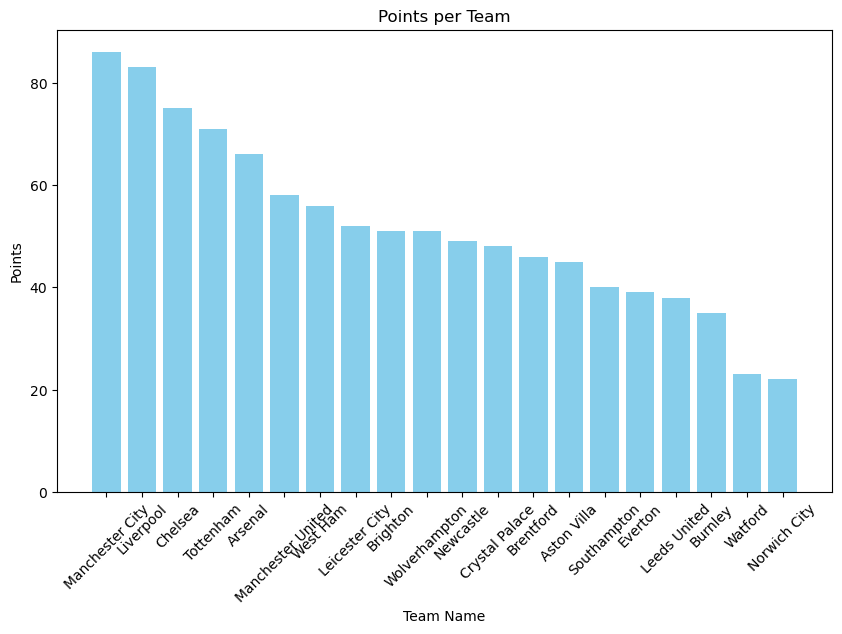

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(df['Team_Name'], df['Points'], color='skyblue')
plt.xlabel('Team Name')
plt.ylabel('Points')
plt.title('Points per Team')
plt.xticks(rotation=45)
plt.show()


In [25]:
df

Team_ID          Team_Name  Points  Played  Wins  Draws  Losses  \
0         1    Manchester City      86      38    27      5       6   
1         2          Liverpool      83      38    25      8       5   
2         3            Chelsea      75      38    22      9       7   
3         4          Tottenham      71      38    21      8       9   
4         5            Arsenal      66      38    20      6      12   
5         6  Manchester United      58      38    16     10      12   
6         7           West Ham      56      38    16      8      14   
7         8     Leicester City      52      38    14     10      14   
8         9           Brighton      51      38    12     15      11   
9        10      Wolverhampton      51      38    15      6      17   
10       11          Newcastle      49      38    13     10      15   
11       12     Crystal Palace      48      38    11     15      12   
12       13          Brentford      46      38    13      7      18   
13       14        Aston Villa      45      38    13      6      19   
14       15        Southampton      40      38    10     10      18   
15       16            Everton      39      38    11      6      21   
16       17       Leeds United      38      38     9     11      18   
17       18            Burnley      35      38     7     14      17   
18       19            Watford      23      38     6      5      27   
19       20       Norwich City      22      38     5      7      26   

    Goals_For  Goals_Against  Goal_Difference  
0          95             30               65  
1          89             33               56  
2          76             32               44  
3          69             35               34  
4          63             42               21  
5          57             50                7  
6          60             51                9  
7          53             58               -5  
8          42             44               -2  
9          38             43               -5  
10         44             62              -18  
11         50             46                4  
12         48             56               -8  
13         52             54               -2  
14         43             67              -24  
15         43             66              -23  
16         42             79              -37  
17         34             53              -19  
18         34             77              -43  
19         23             84              -61

In [29]:
iso = IsolationForest(contamination = 0.1)
df['anomaly']=iso.fit_predict(df[['Played', 'Points']])
anomalies = df[df['anomaly']==-1]
print(anomalies)

    Team_ID        Team_Name  Points  Played  Wins  Draws  Losses  Goals_For  \
0         1  Manchester City      86      38    27      5       6         95   
19       20     Norwich City      22      38     5      7      26         23   

    Goals_Against  Goal_Difference  anomaly  
0              30               65       -1  
19             84              -61       -1  


In [30]:
df

Team_ID          Team_Name  Points  Played  Wins  Draws  Losses  \
0         1    Manchester City      86      38    27      5       6   
1         2          Liverpool      83      38    25      8       5   
2         3            Chelsea      75      38    22      9       7   
3         4          Tottenham      71      38    21      8       9   
4         5            Arsenal      66      38    20      6      12   
5         6  Manchester United      58      38    16     10      12   
6         7           West Ham      56      38    16      8      14   
7         8     Leicester City      52      38    14     10      14   
8         9           Brighton      51      38    12     15      11   
9        10      Wolverhampton      51      38    15      6      17   
10       11          Newcastle      49      38    13     10      15   
11       12     Crystal Palace      48      38    11     15      12   
12       13          Brentford      46      38    13      7      18   
13       14        Aston Villa      45      38    13      6      19   
14       15        Southampton      40      38    10     10      18   
15       16            Everton      39      38    11      6      21   
16       17       Leeds United      38      38     9     11      18   
17       18            Burnley      35      38     7     14      17   
18       19            Watford      23      38     6      5      27   
19       20       Norwich City      22      38     5      7      26   

    Goals_For  Goals_Against  Goal_Difference  anomaly  
0          95             30               65       -1  
1          89             33               56        1  
2          76             32               44        1  
3          69             35               34        1  
4          63             42               21        1  
5          57             50                7        1  
6          60             51                9        1  
7          53             58               -5        1  
8          42             44               -2        1  
9          38             43               -5        1  
10         44             62              -18        1  
11         50             46                4        1  
12         48             56               -8        1  
13         52             54               -2        1  
14         43             67              -24        1  
15         43             66              -23        1  
16         42             79              -37        1  
17         34             53              -19        1  
18         34             77              -43        1  
19         23             84              -61       -1

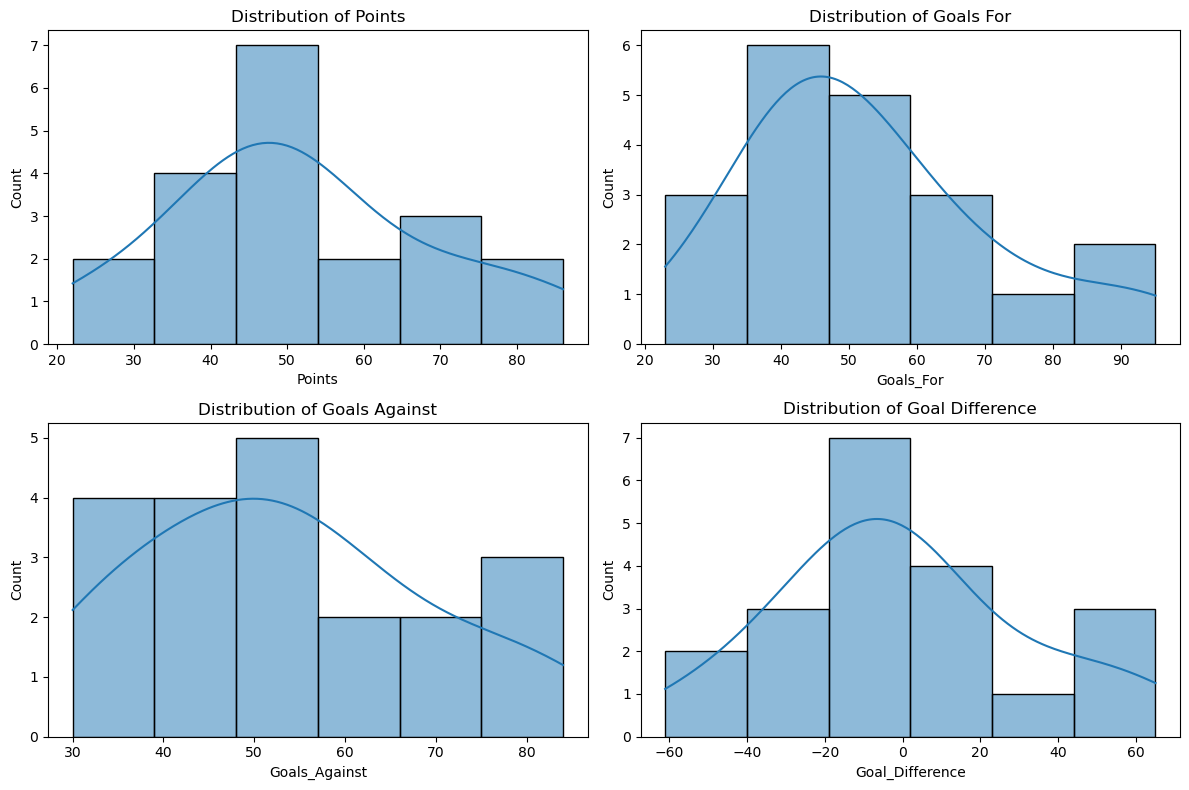

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['Points'], kde=True)
plt.title('Distribution of Points')

plt.subplot(2, 2, 2)
sns.histplot(df['Goals_For'], kde=True)
plt.title('Distribution of Goals For')

plt.subplot(2, 2, 3)
sns.histplot(df['Goals_Against'], kde=True)
plt.title('Distribution of Goals Against')

plt.subplot(2, 2, 4)
sns.histplot(df['Goal_Difference'], kde=True)
plt.title('Distribution of Goal Difference')

plt.tight_layout()
plt.show()


In [32]:
# Correlation matrix
corr_matrix = df.corr()

# Display correlation matrix
print(corr_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()



ValueError: could not convert string to float: 'Manchester City'

In [6]:
import pandas as pd
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

df = pd.read_csv('fg.csv')


c = [-1, 1] 
A = [
    [1, 0],  
    [0, 1], 
]
b = [100, 50] 
x_bounds = (0, None)
y_bounds = (0, None)


res = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')
print('Optimal values:', res.x)
print('Maximum points:', -res.fun)

strategies = np.random.randint(0, 5, size=(1000, 2))  
results = []

for strategy in strategies:
    goals_for = strategy[0]
    goals_against = strategy[1]
    points = goals_for - goals_against 
    results.append(points)

results = np.array(results)
print('Average points:', np.mean(results))
print('Best strategy:', strategies[np.argmax(results)])

X = df[['Goals_For', 'Goals_Against']]
y = (df['Points'] > df['Points'].mean()).astype(int) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy:', (y_pred == y_test).mean())

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['Goals_For', 'Goals_Against'], class_names=['Low Points', 'High Points'], filled=True)
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'fg.csv'

Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



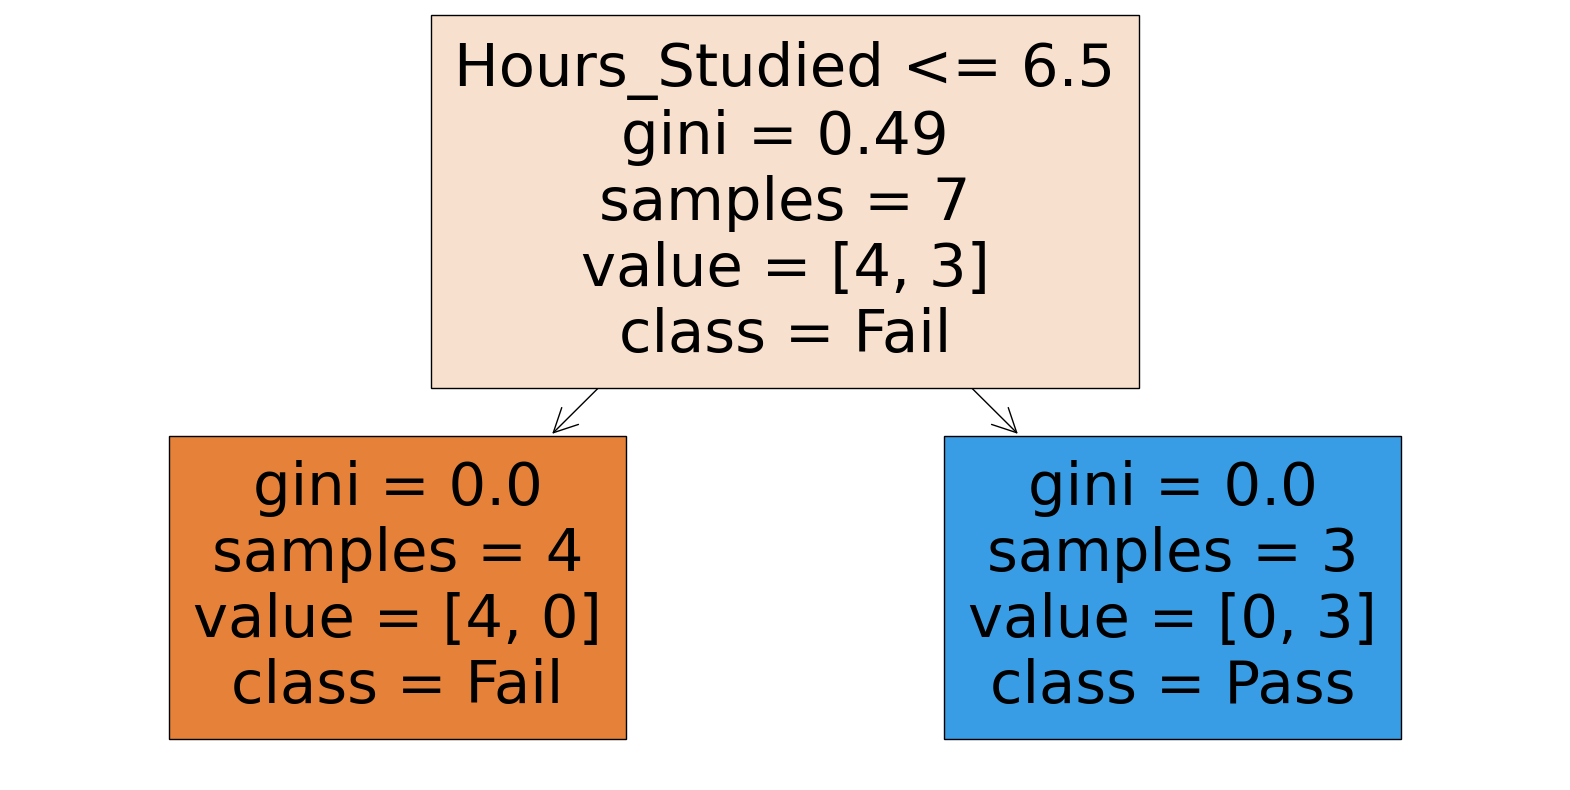

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create a simple dataset
data = {
    'Hours_Studied': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    'Attendance': [90, 80, 70, 60, 50, 40, 30, 20, 10, 0],
    'Pass': ['Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No']
}
df = pd.DataFrame(data)

df['Pass'] = df['Pass'].map({'Yes': 1, 'No': 0})

X = df[['Hours_Studied', 'Attendance']]
y = df['Pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=['Fail', 'Pass'], filled=True)
plt.show()
